In [2]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the datsets
match_df = pd.read_csv("Datasets/matches.csv")
delivery_df = pd.read_csv("Datasets/deliveries.csv")

In [4]:
match_df.shape

(756, 18)

In [5]:
delivery_df.shape

(179078, 21)

In [6]:
# match dataframe
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
# delivery dataframe
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
# Checking the runs c=scored in bth the innnings of each match an storing it in another dataframe
total_score_df = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [9]:
# we just need the first inning total for our calculation
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [10]:
merge = match_df.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on= 'match_id')

In [11]:
merge

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [12]:
merge['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [13]:
# Name of the teams fro the datasets that are playing till today
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [14]:
# Changing the name of the playing teams to their current names
merge['team1'] = merge['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge['team2'] = merge['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

merge['team1'] = merge['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge['team2'] = merge['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge['team1'] = merge['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge['team2'] = merge['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [15]:
# We only need the teams that are playing till current date, so we are dropping others
merge = merge[merge['team1'].isin(teams)]
merge = merge[merge['team2'].isin(teams)]

In [16]:
merge.shape

(641, 20)

In [17]:
# Matches that are affected by DLS method
merge['dl_applied'].value_counts()

dl_applied
0    626
1     15
Name: count, dtype: int64

In [18]:
# We are keeping only those matches that are not affected by DLS
merge = merge[merge['dl_applied'] == 0]
merge

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [19]:
merge = merge[['match_id', 'city', 'winner', 'total_runs']]
merge_df = merge.merge(delivery_df, on = 'match_id')

In [20]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [21]:
merge_df = merge_df[merge_df['inning'] == 2]

In [22]:
merge_df.shape

(72413, 24)

In [23]:
# Checking the null values from both datsets
print(merge_df.isnull().sum())
# print(delivery_df.isnull().sum())

match_id                0
city                  832
winner                 27
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed    68860
dismissal_kind      68860
fielder             69855
dtype: int64


In [24]:
# Checking for Null Values in the merge dataset
print(merge_df.isnull().sum())


match_id                0
city                  832
winner                 27
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed    68860
dismissal_kind      68860
fielder             69855
dtype: int64


In [25]:
# Filling the missing values in the city column with the moe of their records and the winner column with No result
merge_df = merge_df.assign(
    city = merge_df['city'].fillna(merge_df['city'].mode()[0]),
    winner = merge_df['winner'].fillna('No Result')
)



In [26]:
# Checking after filling the missing values
print(merge_df.isnull().sum())


match_id                0
city                    0
winner                  0
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed    68860
dismissal_kind      68860
fielder             69855
dtype: int64


In [27]:
# Check Data Types of each column
print(merge_df.dtypes)



match_id             int64
city                object
winner              object
total_runs_x         int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs_y         int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object


In [28]:
# Check Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers' 'No Result'
 'Delhi Capitals']
['Royal Challengers Bangalore' 'Delhi Daredevils' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings' 'Deccan Chargers'
 'Delhi Capitals']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Delhi Capitals']


In [29]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['winner'] = merge_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge_df['batting_team'] = merge_df['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['winner'] = merge_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')



In [30]:
# Check Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Chennai Super Kings' 'Rajasthan Royals' 'No Result']
['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals']


In [31]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge_df['winner'] = merge_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [32]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [33]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
merge_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Rajasthan Royals', 'Chennai Super Kings'], dtype=object)

In [34]:
merge_df['batting_team'] = merge_df['batting_team'].str.strip()


In [35]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [36]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Punjab Kings' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [37]:
# We take the help of cumulative sum to calculate the total runs ball by ball
merge_df['current_score'] = merge_df.groupby(['match_id'])['total_runs_y'].cumsum()

In [38]:
merge_df['runs_left'] = (merge_df['total_runs_x'] - merge_df['current_score']) + 1

In [39]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [40]:
merge_df['balls_left'] = 126 - (merge_df['over']*6 + merge_df['ball'])

In [41]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [42]:
merge_df['player_dismissed'] = merge_df['player_dismissed'].fillna("0")
merge_df['player_dismissed'] = merge_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
merge_df['player_dismissed'] = merge_df['player_dismissed'].astype('int')
wickets = merge_df.groupby('match_id')['player_dismissed'].cumsum()
merge_df['wickets'] = 10 - wickets
merge_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [43]:
# CRR
merge_df['crr'] = (merge_df['current_score']*6)/(120 - merge_df['balls_left'])

In [44]:
#Required runrate
merge_df['rrr'] = (merge_df['runs_left']*6)/merge_df['balls_left']

In [45]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-1,3,5,7.897436,-2.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,-6.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-4,1,4,7.915966,-24.000000


In [46]:
#Result declare in form of 0 & 1
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [47]:
# Deleting the unnecessary columns
merge_df  = merge_df.drop(columns = [ 'dismissal_kind', 'fielder'])

In [48]:
merge_df['result'] = merge_df.apply(result,axis=1)

In [49]:
print(merge_df.isnull().sum())

match_id            0
city                0
winner              0
total_runs_x        0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs_y        0
player_dismissed    0
current_score       0
runs_left           0
balls_left          0
wickets             0
crr                 0
rrr                 5
result              0
dtype: int64


In [50]:
# Checking the first 5 rows
print(merge_df.head())


     match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... extra_runs total_runs_y  player_dismissed  \
125       CH Gayle  ...          0            1                 0   
126  Mandeep Singh  

In [51]:
# Saving the cleaned datset into a new dataset
merge_df.to_csv('Datasets/final_dataset.csv', index=False)


In [52]:
final_df =merge_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [53]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,152,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,152,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,152,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,152,7.915966,-24.000000,0


In [54]:
final_df = final_df.sample(final_df.shape[0])


In [55]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
29323,Sunrisers Hyderabad,Delhi Capitals,Durban,123,83,8,173,8.270270,8.891566,0
144152,Delhi Capitals,Punjab Kings,Delhi,110,87,9,168,10.727273,7.586207,1
21245,Royal Challengers Bangalore,Sunrisers Hyderabad,Cape Town,174,112,9,184,8.250000,9.321429,0
133654,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,184,118,10,183,0.000000,9.355932,1
9107,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,101,60,8,214,11.400000,10.100000,1
...,...,...,...,...,...,...,...,...,...,...
32016,Punjab Kings,Chennai Super Kings,Durban,92,95,9,116,6.000000,5.810526,0
124107,Chennai Super Kings,Punjab Kings,Mohali,86,45,7,198,9.040000,11.466667,0
81321,Chennai Super Kings,Mumbai Indians,Mumbai,138,117,10,139,4.000000,7.076923,0
21812,Kolkata Knight Riders,Rajasthan Royals,Cape Town,72,48,6,150,6.583333,9.000000,0


In [56]:
final_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Punjab Kings', 'Chennai Super Kings',
       'Mumbai Indians'], dtype=object)

In [57]:
final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')

In [58]:
final_df['bowling_team'].unique()

array(['Delhi Capitals', 'Punjab Kings', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Chennai Super Kings'],
      dtype=object)

In [59]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
77758,Delhi Capitals,Punjab Kings,Dharamsala,160,98,9,171,3.272727,9.795918,0


# EDA ( Exploratory Data Analysis)


In [60]:
final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
final_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Punjab Kings', 'Chennai Super Kings',
       'Mumbai Indians'], dtype=object)

In [61]:
final_df['bowling_team'].unique()


array(['Delhi Capitals', 'Punjab Kings', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Chennai Super Kings'],
      dtype=object)

C:\Users\Aman Gupta\AppData\Local\Temp\ipykernel_21140\601794695.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = team_matches.index, y = team_matches.values, palette = 'Dark2')


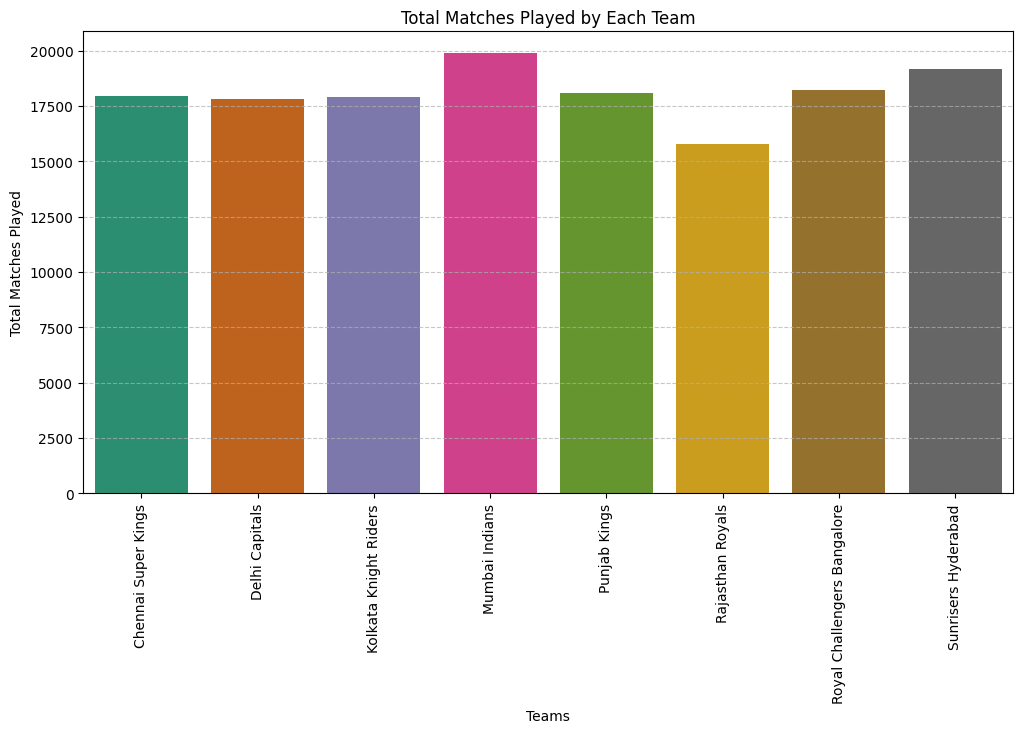

In [62]:
# Total Matches Played by Each Team
# We are using matplotlib and seaborn library for data visualization with different graphs and charts

team_matches = final_df['batting_team'].value_counts() + final_df['bowling_team'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = team_matches.index, y = team_matches.values, palette = 'Dark2')
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Total Matches Played")
plt.title("Total Matches Played by Each Team")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





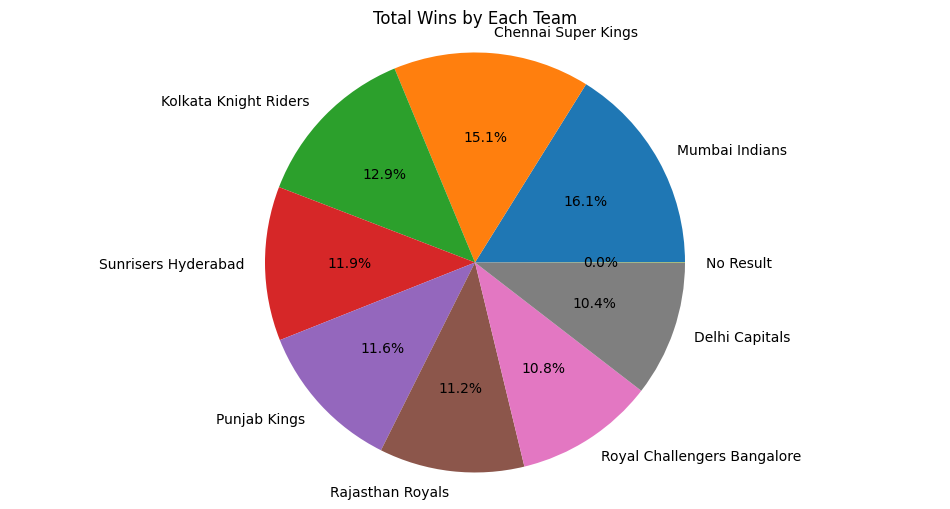

In [63]:
# Total number of wins by each team
winner_counts = merge_df['winner'].value_counts()
plt.figure(figsize = (12,6))
plt.pie(winner_counts, labels = winner_counts.index, autopct='%1.1f%%')
plt.title("Total Wins by Each Team")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [64]:
# We can see that Mumbai Indians has the highest winning percentage and Delhi Capitals has the lowest one(Excluding No Result).

C:\Users\Aman Gupta\AppData\Local\Temp\ipykernel_21140\603257373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = team_total_runs.index, y = team_total_runs.values, palette = 'Set1')


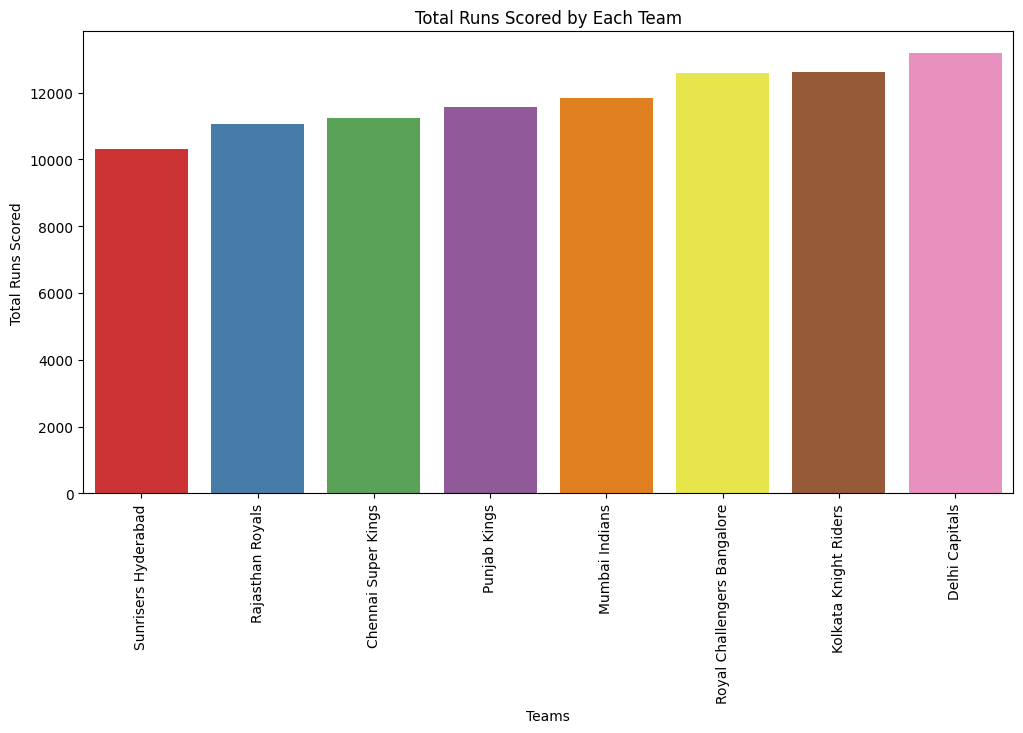

In [65]:
# Total runs scored by each team
team_total_runs = merge_df.groupby('batting_team')['total_runs_y'].sum().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x = team_total_runs.index, y = team_total_runs.values, palette = 'Set1')
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored by Each Team")
plt.show()


C:\Users\Aman Gupta\AppData\Local\Temp\ipykernel_21140\881937860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = city_matches.index, y=city_matches.values, palette = 'Spectral')


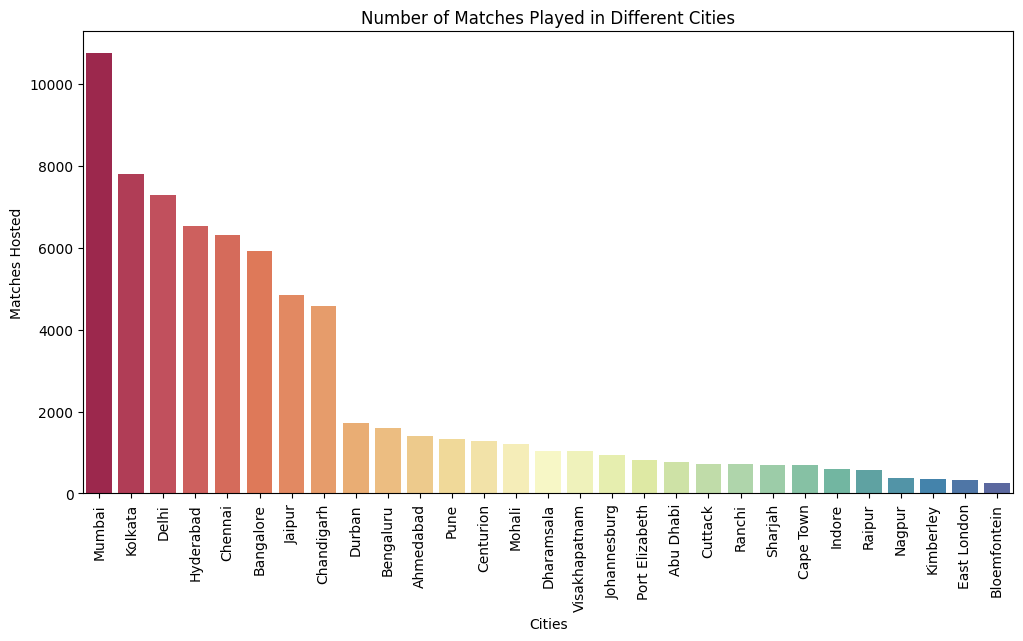

In [66]:
# Matches played in different cities
city_matches = merge_df['city'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = city_matches.index, y=city_matches.values, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Matches Hosted")
plt.title("Number of Matches Played in Different Cities")
plt.show()


In [67]:
# We can see that the most number of matches played in the city of Mumbai and the least number of matches was played in Bloemfontein

## Data Preprocessing

In [68]:
final_df.dropna(inplace=True)

In [69]:
final_df = final_df[final_df['balls_left'] != 0]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target
X = final_df.drop('result', axis=1)
y = final_df['result']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
categorical_features = ['batting_team', 'bowling_team', 'city']
numeric_features = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']


In [71]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
44502,Royal Challengers Bangalore,Sunrisers Hyderabad,Nagpur,29,14,4,151,6.962264,12.428571
142036,Royal Challengers Bangalore,Punjab Kings,Mohali,47,20,8,180,8.040000,14.100000
78231,Chennai Super Kings,Sunrisers Hyderabad,Chennai,151,110,10,159,5.400000,8.236364
12458,Delhi Capitals,Mumbai Indians,Mumbai,103,69,7,162,7.058824,8.956522
78791,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,56,36,8,144,6.357143,9.333333
...,...,...,...,...,...,...,...,...,...
58549,Mumbai Indians,Chennai Super Kings,Chennai,60,84,10,112,8.833333,4.285714
94644,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,148,88,10,190,8.062500,10.090909
49179,Mumbai Indians,Royal Challengers Bangalore,Bangalore,79,71,9,140,7.591837,6.676056
114757,Mumbai Indians,Kolkata Knight Riders,Kolkata,38,26,7,187,9.574468,8.769231


In [72]:
from sklearn.compose import ColumnTransformer
# Column transformer
preprocessor = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])


# Model Training 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



### Logistic Regression


In [74]:
# Create a pipeline with logistic regression
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Logistic Regression Accuracy: 0.8009005888465535
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      6759
           1       0.81      0.82      0.81      7676

    accuracy                           0.80     14435
   macro avg       0.80      0.80      0.80     14435
weighted avg       0.80      0.80      0.80     14435

Confusion Matrix:
 [[5265 1494]
 [1380 6296]]


### Random Forest Classifier


In [76]:
random_pipe = Pipeline(steps=[
    ('step1',preprocessor),
    ('step2',RandomForestClassifier())
])

random_pipe.fit(X_train,y_train)

y_pred = random_pipe.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.9981988223068929

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6759
           1       1.00      1.00      1.00      7676

    accuracy                           1.00     14435
   macro avg       1.00      1.00      1.00     14435
weighted avg       1.00      1.00      1.00     14435


Confusion Matrix:
 [[6746   13]
 [  13 7663]]


### XGBoost Classifier(Extreme Gradient Boosting)

In [78]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[
    ('step1', preprocessor), 
    ('step2', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
xgb_pipe.fit(X_train, y_train)

y_pred = xgb_pipe.predict(X_test)


c:\Users\Aman Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:15:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


XGBoost Accuracy: 0.997783165916176

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6759
           1       1.00      1.00      1.00      7676

    accuracy                           1.00     14435
   macro avg       1.00      1.00      1.00     14435
weighted avg       1.00      1.00      1.00     14435


Confusion Matrix:
 [[6738   21]
 [  11 7665]]


### AdaBoost Classifier(Adaptive Boosting)

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create AdaBoost model with DecisionTreeClassifier as the base estimator
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_pipe = Pipeline(steps=[
    ('step1', preprocessor),        
    ('step2', ada_model)   
])

ada_pipe.fit(X_train, y_train)
y_pred = ada_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7504676134395566

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      6759
           1       0.79      0.72      0.75      7676

    accuracy                           0.75     14435
   macro avg       0.75      0.75      0.75     14435
weighted avg       0.75      0.75      0.75     14435


Confusion Matrix:
 [[5302 1457]
 [2145 5531]]


### SVM(Support Vector Machine)

In [82]:
from sklearn.svm import SVC

# Pipeline
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train
svc_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred_svc = svc_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classifier Report:\n")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.9569102874956702
SVC Classifier Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6759
           1       0.96      0.96      0.96      7676

    accuracy                           0.96     14435
   macro avg       0.96      0.96      0.96     14435
weighted avg       0.96      0.96      0.96     14435

Confusion Matrix:
 [[6415  344]
 [ 278 7398]]


# Performance Evaluation

## Precision, Recall & F1-Score
Precision (aka **positive predictive value**) and Recall (aka **sensitivity**) are measurements used both for analysis and calculation of the more holistic F1 score. - Precision is "how useful the results are", and - Recall is "how complete the results are".

    Higher values are better for precision, recall and F1 and they range from 0 to 1.

**F1 is a measure of accuracy that takes into account both false positives and false negatives.**

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$


$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

$$
F_1 = \left( \frac{1}{2} \left( \frac{1}{\text{recall}} + \frac{1}{\text{precision}} \right) \right)^{-1} = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$



In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Accuracy
accuracy_score(y_test,y_pred_svc)

0.9569102874956702

In [84]:
# Precision
precision_score(y_test, y_pred_svc)


0.9555670369413588

In [85]:
# Recall
recall_score(y_test, y_pred_svc)

0.9637832204273059

In [86]:
# F1 Score
f1_score(y_test, y_pred_svc)

0.9596575431314048

In [87]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)

[[6415  344]
 [ 278 7398]]


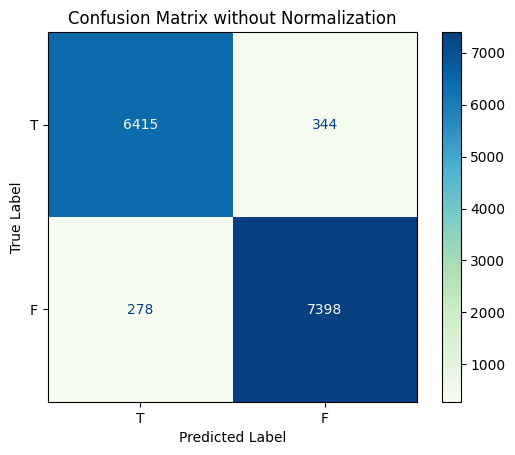

In [88]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels= ['T', 'F']
)
disp.plot(cmap='GnBu')
plt.title("Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Normalized Confusion Matrix
[[0.9491 0.0509]
 [0.0362 0.9638]]


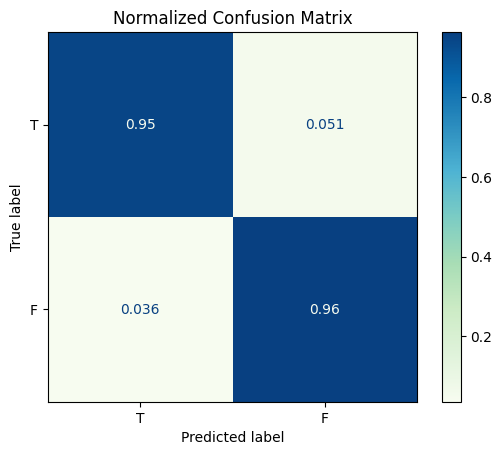

In [89]:
# Normalization of Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix")
np.set_printoptions(precision=4, suppress=True)
print(cm_normalized)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, normalize='true', display_labels=["T", "F"], cmap='GnBu')
disp.ax_.set_title("Normalized Confusion Matrix")
plt.show()

### Area Under the Curve (AUC)
Area Under the Curve (AUC) is closely related to the (Receiver Operating Characteristic) ROC chart. Both will make use of the data.

In [90]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y_test}")
print(f"Y_HAT: {y_pred_svc}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: 90780     1
122854    1
94248     1
30146     1
134005    0
         ..
3753      1
2803      0
113285    0
122572    1
26210     0
Name: result, Length: 14435, dtype: int64
Y_HAT: [1 1 1 ... 0 1 0]
FPR: [0.     0.0509 1.    ]
TPR: [0.     0.9638 1.    ]
Optimal threshold index: 1
Optimal threshold value: 1.0
AUC: 0.9564440588007221


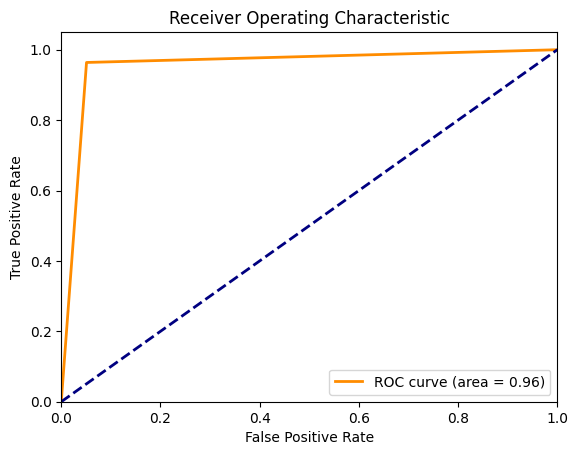

In [91]:
# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
plt.show()

In general, a ROC chart with a large amount of space below the curve is desirable. Below 0.5 is a very bad model and the closer to 1.0 you can go (without overfitting) the better.

In [92]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
90780,Punjab Kings,Royal Challengers Bangalore,Mumbai,61,59,7,124,6.295082,6.203390
122854,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,87,75,9,155,9.200000,6.960000
94248,Chennai Super Kings,Mumbai Indians,Mumbai,12,7,5,157,7.752212,10.285714
30146,Punjab Kings,Delhi Capitals,Bloemfontein,-2,5,6,120,6.417391,-2.400000
134005,Mumbai Indians,Delhi Capitals,Delhi,50,20,3,186,8.220000,15.000000
...,...,...,...,...,...,...,...,...,...
3753,Kolkata Knight Riders,Delhi Capitals,Kolkata,66,63,9,160,10.000000,6.285714
2803,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,178,109,9,191,7.636364,9.798165
113285,Chennai Super Kings,Mumbai Indians,Mumbai,109,66,8,187,8.777778,9.909091
122572,Chennai Super Kings,Kolkata Knight Riders,Chennai,185,110,10,207,13.800000,10.090909


In [93]:
svc_pipe.predict_proba(X_test)[10]


array([0., 1.])

In [94]:
import pickle
pickle.dump(svc_pipe,open('pipe.pkl','wb'))